In [1]:
# Clone repository
!git clone https://github.com/Tushar365/finetune-changeformer.git
%cd finetune-changeformer

Cloning into 'finetune-changeformer'...
remote: Enumerating objects: 1308, done.
remote: Counting objects: 100% (1308/1308), done.
remote: Compressing objects: 100% (569/569), done.
remote: Total 1308 (delta 736), reused 1297 (delta 727), pack-reused 0 (from 0)
Receiving objects: 100% (1308/1308), 14.03 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (736/736), done.
/content/finetune-changeformer


Those three Colab lines batch-edit every .py file under /content/finetune-changeformer to add weights_only=False to torch.load calls so legacy ChangeFormer checkpoints load correctly on newer PyTorch builds that otherwise expect “weights-only” safe loading by default or emit warnings/errors.​

Line 1: Rewrites torch.load(self.args.pretrain) to torch.load(self.args.pretrain, weights_only=False) to allow loading full pickled objects from a trusted pretrain path.​

Line 2: Injects weights_only=False into torch.load(os.path.join(self.checkpoint_dir, checkpoint_name), …) without removing existing args, preserving call behavior while restoring permissive deserialization.​

Line 3: Updates torch.load(ckpt_path) to torch.load(ckpt_path, weights_only=False) for generic checkpoint paths.​

Why needed: Recent PyTorch versions promote or default to safer “weights-only” deserialization, which can break older repos that saved full objects; explicitly setting weights_only=False restores compatibility but should be used only for trusted checkpoints due to pickle execution risks.​

Tip: Prefer weights_only=True plus model.load_state_dict(...) when loading untrusted files, aligning with PyTorch’s recommended best practice.

In [2]:
!find /content/finetune-changeformer -type f -name "*.py" -exec sed -i 's|torch.load(self.args.pretrain)|torch.load(self.args.pretrain, weights_only=False)|g' {} +
!find /content/finetune-changeformer -type f -name "*.py" -exec sed -i 's|torch.load(os.path.join(self.checkpoint_dir, checkpoint_name),|torch.load(os.path.join(self.checkpoint_dir, checkpoint_name), weights_only=False,|g' {} +
!find /content/finetune-changeformer -type f -name "*.py" -exec sed -i 's|torch.load(ckpt_path)|torch.load(ckpt_path, weights_only=False)|g' {} +


In [3]:
#imports
!pip install torch torchvision einops matplotlib timm tqdm scipy gdown

data original source --- https://justchenhao.github.io/LEVIR/

In [4]:
# download the dataser --- LEVIR-CD256.zip
!gdown 1NLD2JptwxXxKj9kjSdfJ2abhsKkVK_mk

Downloading...
From (original): https://drive.google.com/uc?id=1NLD2JptwxXxKj9kjSdfJ2abhsKkVK_mk
From (redirected): https://drive.google.com/uc?id=1NLD2JptwxXxKj9kjSdfJ2abhsKkVK_mk&confirm=t&uuid=6170658b-64e2-4402-acf6-de5d5b590216
To: /content/finetune-changeformer/LEVIR-CD256.zip
100% 2.48G/2.48G [00:21<00:00, 113MB/s]


In [5]:
#unzip data
!unzip LEVIR-CD256.zip

Streaming output truncated to the last 5000 lines.
  inflating: LEVIR-CD256/label/train_143_16.png  
  inflating: LEVIR-CD256/label/train_147_2.png  
  inflating: LEVIR-CD256/label/train_149_12.png  
  inflating: LEVIR-CD256/label/train_162_3.png  
  inflating: LEVIR-CD256/label/train_163_12.png  
  inflating: LEVIR-CD256/label/train_168_6.png  
  inflating: LEVIR-CD256/label/train_175_6.png  
  inflating: LEVIR-CD256/label/train_190_3.png  
  inflating: LEVIR-CD256/label/train_193_3.png  
  inflating: LEVIR-CD256/label/train_198_8.png  
  inflating: LEVIR-CD256/label/train_200_1.png  
  inflating: LEVIR-CD256/label/train_20_9.png  
  inflating: LEVIR-CD256/label/train_224_11.png  
  inflating: LEVIR-CD256/label/train_229_11.png  
  inflating: LEVIR-CD256/label/train_238_8.png  
  inflating: LEVIR-CD256/label/train_244_4.png  
  inflating: LEVIR-CD256/label/train_247_3.png  
  inflating: LEVIR-CD256/label/train_249_13.png  
  inflating: LEVIR-CD256/label/train_251_2.png  
  inflating: 

In [6]:
#import my model
!gdown 1WxRlCWvmp20Gg6TwtFX33ax90QuQhIm2

Downloading...
From (original): https://drive.google.com/uc?id=1WxRlCWvmp20Gg6TwtFX33ax90QuQhIm2
From (redirected): https://drive.google.com/uc?id=1WxRlCWvmp20Gg6TwtFX33ax90QuQhIm2&confirm=t&uuid=c5d86836-77de-4177-88c0-0e569ce68750
To: /content/finetune-changeformer/1_CHANGEFORMER_FINETUNED.zip
100% 608M/608M [00:06<00:00, 94.4MB/s]


In [7]:
!unzip 1_CHANGEFORMER_FINETUNED.zip

Archive:  1_CHANGEFORMER_FINETUNED.zip
   creating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/log_test.txt  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/scores_dict.npy  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/train_acc.npy  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/log.txt  
 extracting: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/0.758170436996565.txt  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/last_ckpt.pt  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/val_acc.npy  
  inflating: content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/best_ckpt.pt  


In [8]:
# ChangeFormer V6 Advanced Inference & Visualization (Colab-ready)
# Refactored into a clean, reusable pipeline

from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
from typing import Tuple, Optional, Dict, Any
import warnings
warnings.filterwarnings('ignore')

# ---------------------------
# Configuration Constants
# ---------------------------
DEFAULT_IMG_SIZE = (256, 256)
NORMALIZATION_MEAN = [0.485, 0.456, 0.406]
NORMALIZATION_STD = [0.229, 0.224, 0.225]
DEFAULT_MIN_AREA = 16
DEFAULT_SOFT_THRESHOLD = 0.15

# ---------------------------
# Model Loading
# ---------------------------
def load_changeformer_model(checkpoint_path: str,
                           input_nc: int = 3,
                           output_nc: int = 2,
                           embed_dim: int = 256,
                           device: str = 'cuda'):
    """
    Load ChangeFormer V6 model from checkpoint.

    Args:
        checkpoint_path: Path to model checkpoint
        input_nc: Number of input channels
        output_nc: Number of output classes
        embed_dim: Embedding dimension
        device: Device to load model on ('cpu' or 'cuda')

    Returns:
        Loaded model in evaluation mode
    """
    from models.ChangeFormer import ChangeFormerV6

    model = ChangeFormerV6(input_nc=input_nc, output_nc=output_nc, embed_dim=embed_dim)
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    state_dict = checkpoint.get("model_G_state_dict", checkpoint)
    model.load_state_dict(state_dict)
    model.eval()
    model.to(device)
    return model

# ---------------------------
# Image Preprocessing
# ---------------------------
def get_transform(img_size: Tuple[int, int] = DEFAULT_IMG_SIZE):
    """Create image transformation pipeline."""
    return transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize(NORMALIZATION_MEAN, NORMALIZATION_STD)
    ])

def preprocess_image(img_path: str,
                    img_size: Tuple[int, int] = DEFAULT_IMG_SIZE) -> Tuple[torch.Tensor, Image.Image]:
    """
    Load and preprocess image for model inference.

    Args:
        img_path: Path to image file
        img_size: Target image size (height, width)

    Returns:
        Tuple of (preprocessed tensor, resized PIL image)
    """
    img = Image.open(img_path).convert("RGB")
    transform = get_transform(img_size)
    tensor = transform(img).unsqueeze(0)
    resized_img = img.resize(img_size)
    return tensor, resized_img

# ---------------------------
# Inference
# ---------------------------
def predict_change(model: torch.nn.Module,
                  pre_tensor: torch.Tensor,
                  post_tensor: torch.Tensor,
                  device: str = 'cpu') -> Tuple[np.ndarray, np.ndarray]:
    """
    Run change detection inference.

    Args:
        model: ChangeFormer model
        pre_tensor: Pre-disaster image tensor
        post_tensor: Post-disaster image tensor
        device: Device for computation

    Returns:
        Tuple of (binary change mask, probability heatmap)
    """
    pre_tensor = pre_tensor.to(device)
    post_tensor = post_tensor.to(device)

    with torch.no_grad():
        output = model(pre_tensor, post_tensor)
        if isinstance(output, (tuple, list)):
            output = output[-1]

        # Binary mask (argmax)
        mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

        # Probability heatmap for "change" class
        prob_change = torch.softmax(output, dim=1)[0, 1].cpu().numpy()

    return mask, prob_change

# ---------------------------
# Visualization Utilities
# ---------------------------
def create_overlay_visualization(post_img: Image.Image,
                                mask: np.ndarray,
                                alpha: float = 0.3) -> np.ndarray:
    """Create red overlay on detected changes."""
    post_np = np.array(post_img)
    overlay = post_np.copy()
    overlay[mask > 0] = [255, 0, 0]
    return cv2.addWeighted(post_np, 1-alpha, overlay, alpha, 0)

def extract_bounding_boxes(mask: np.ndarray,
                          min_area: int = DEFAULT_MIN_AREA) -> list:
    """
    Extract bounding boxes from binary mask.

    Args:
        mask: Binary change mask
        min_area: Minimum area threshold for valid boxes

    Returns:
        List of bounding boxes [(x, y, w, h), ...]
    """
    mask_uint8 = (mask > 0).astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h >= min_area:
            boxes.append((x, y, w, h))
    return boxes

def draw_bounding_boxes(img: Image.Image,
                       boxes: list,
                       color: Tuple[int, int, int] = (255, 0, 0),
                       thickness: int = 2) -> np.ndarray:
    """Draw bounding boxes on image."""
    img_np = np.array(img).copy()
    for (x, y, w, h) in boxes:
        cv2.rectangle(img_np, (x, y), (x+w, y+h), color, thickness)
    return img_np

# ---------------------------
# Main Pipeline Function
# ---------------------------
def run_change_detection_pipeline(
    checkpoint_path: str,
    pre_image_path: str,
    post_image_path: str,
    min_area: int = DEFAULT_MIN_AREA,
    soft_threshold: float = DEFAULT_SOFT_THRESHOLD,
    device: str = 'cpu',
    save_outputs: bool = False,
    output_dir: Optional[str] = None,
    show_plots: bool = True
) -> Dict[str, Any]:
    """
    Complete change detection pipeline with visualization.

    Args:
        checkpoint_path: Path to ChangeFormer checkpoint
        pre_image_path: Path to pre-disaster image
        post_image_path: Path to post-disaster image
        min_area: Minimum area for bounding boxes
        soft_threshold: Probability threshold for soft masking
        device: Computation device ('cpu' or 'cuda')
        save_outputs: Whether to save output images
        output_dir: Directory to save outputs
        show_plots: Whether to display matplotlib plots

    Returns:
        Dictionary containing masks, probabilities, and statistics
    """

    # 1. Load model
    print("=" * 60)
    print("🔧 LOADING MODEL")
    print("=" * 60)
    model = load_changeformer_model(checkpoint_path, device=device)
    print(f"✓ Model loaded from: {checkpoint_path}\n")

    # 2. Preprocess images
    print("=" * 60)
    print("📸 PREPROCESSING IMAGES")
    print("=" * 60)
    pre_tensor, pre_pil = preprocess_image(pre_image_path)
    post_tensor, post_pil = preprocess_image(post_image_path)
    print(f"✓ Pre-disaster:  {pre_image_path}")
    print(f"✓ Post-disaster: {post_image_path}\n")

    # 3. Run inference
    print("=" * 60)
    print("🔍 RUNNING CHANGE DETECTION")
    print("=" * 60)
    mask, prob_change = predict_change(model, pre_tensor, post_tensor, device)

    # Statistics
    total_pixels = mask.size
    changed_pixels = np.sum(mask > 0)
    change_percentage = (changed_pixels / total_pixels) * 100

    print(f"✓ Inference complete")
    print(f"  - Total pixels: {total_pixels}")
    print(f"  - Changed pixels: {changed_pixels}")
    print(f"  - Change percentage: {change_percentage:.2f}%")
    print(f"  - Unique mask values: {np.unique(mask)}\n")

    # 4. Generate soft threshold mask
    soft_mask = (prob_change > soft_threshold).astype(np.uint8)
    soft_changed_pixels = np.sum(soft_mask > 0)
    soft_change_percentage = (soft_changed_pixels / total_pixels) * 100

    print(f"  Soft threshold ({soft_threshold}):")
    print(f"  - Changed pixels: {soft_changed_pixels}")
    print(f"  - Change percentage: {soft_change_percentage:.2f}%\n")

    # 5. Extract bounding boxes
    hard_boxes = extract_bounding_boxes(mask, min_area)
    soft_boxes = extract_bounding_boxes(soft_mask, min_area)

    print(f"  Bounding boxes (min area: {min_area}):")
    print(f"  - Hard threshold: {len(hard_boxes)} boxes")
    print(f"  - Soft threshold: {len(soft_boxes)} boxes\n")

    # 6. Visualize results
    if show_plots:
        print("=" * 60)
        print("📊 GENERATING VISUALIZATIONS")
        print("=" * 60)

        # Setup figure with better layout
        fig = plt.figure(figsize=(18, 10))

        # Row 1: Original images
        plt.subplot(2, 3, 1)
        plt.imshow(pre_pil)
        plt.title("Pre-Disaster Image", fontsize=12, fontweight='bold')
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(post_pil)
        plt.title("Post-Disaster Image", fontsize=12, fontweight='bold')
        plt.axis('off')

        # Row 1: Change overlay
        plt.subplot(2, 3, 3)
        overlay = create_overlay_visualization(post_pil, mask, alpha=0.3)
        plt.imshow(overlay)
        plt.title(f"Change Overlay ({change_percentage:.2f}% changed)",
                 fontsize=12, fontweight='bold')
        plt.axis('off')

        # Row 2: Probability heatmap
        plt.subplot(2, 3, 4)
        plt.imshow(prob_change, cmap='hot', interpolation='nearest')
        plt.title("Change Probability Heatmap", fontsize=12, fontweight='bold')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.axis('off')

        # Row 2: Hard threshold bounding boxes
        plt.subplot(2, 3, 5)
        hard_bbox_img = draw_bounding_boxes(post_pil, hard_boxes)
        plt.imshow(hard_bbox_img)
        plt.title(f"Hard Threshold ({len(hard_boxes)} boxes)",
                 fontsize=12, fontweight='bold')
        plt.axis('off')

        # Row 2: Soft threshold bounding boxes
        plt.subplot(2, 3, 6)
        soft_bbox_img = draw_bounding_boxes(post_pil, soft_boxes)
        plt.imshow(soft_bbox_img)
        plt.title(f"Soft Threshold ({len(soft_boxes)} boxes)",
                 fontsize=12, fontweight='bold')
        plt.axis('off')

        plt.tight_layout()

        if save_outputs and output_dir:
            import os
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, 'change_detection_results.png')
            plt.savefig(output_path, dpi=150, bbox_inches='tight')
            print(f"✓ Visualization saved: {output_path}\n")

        plt.show()

    # 7. Return results
    results = {
        'mask': mask,
        'probability_map': prob_change,
        'soft_mask': soft_mask,
        'hard_boxes': hard_boxes,
        'soft_boxes': soft_boxes,
        'statistics': {
            'total_pixels': total_pixels,
            'changed_pixels': changed_pixels,
            'change_percentage': change_percentage,
            'soft_changed_pixels': soft_changed_pixels,
            'soft_change_percentage': soft_change_percentage,
            'num_hard_boxes': len(hard_boxes),
            'num_soft_boxes': len(soft_boxes)
        }
    }

    print("=" * 60)
    print("✅ PIPELINE COMPLETE")
    print("=" * 60)

    return results




🔧 LOADING MODEL
✓ Model loaded from: /content/finetune-changeformer/content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/best_ckpt.pt

📸 PREPROCESSING IMAGES
✓ Pre-disaster:  /content/finetune-changeformer/LEVIR-CD256/A/test_100_11.png
✓ Post-disaster: /content/finetune-changeformer/LEVIR-CD256/B/test_100_11.png

🔍 RUNNING CHANGE DETECTION
✓ Inference complete
  - Total pixels: 65536
  - Changed pixels: 5166
  - Change percentage: 7.88%
  - Unique mask values: [0 1]

  Soft threshold (0.15):
  - Changed pixels: 16415
  - Change percentage: 25.05%

  Bounding boxes (min area: 4):
  - Hard threshold: 27 boxes
  - Soft threshold: 43 boxes

📊 GENERATING VISUALIZATIONS


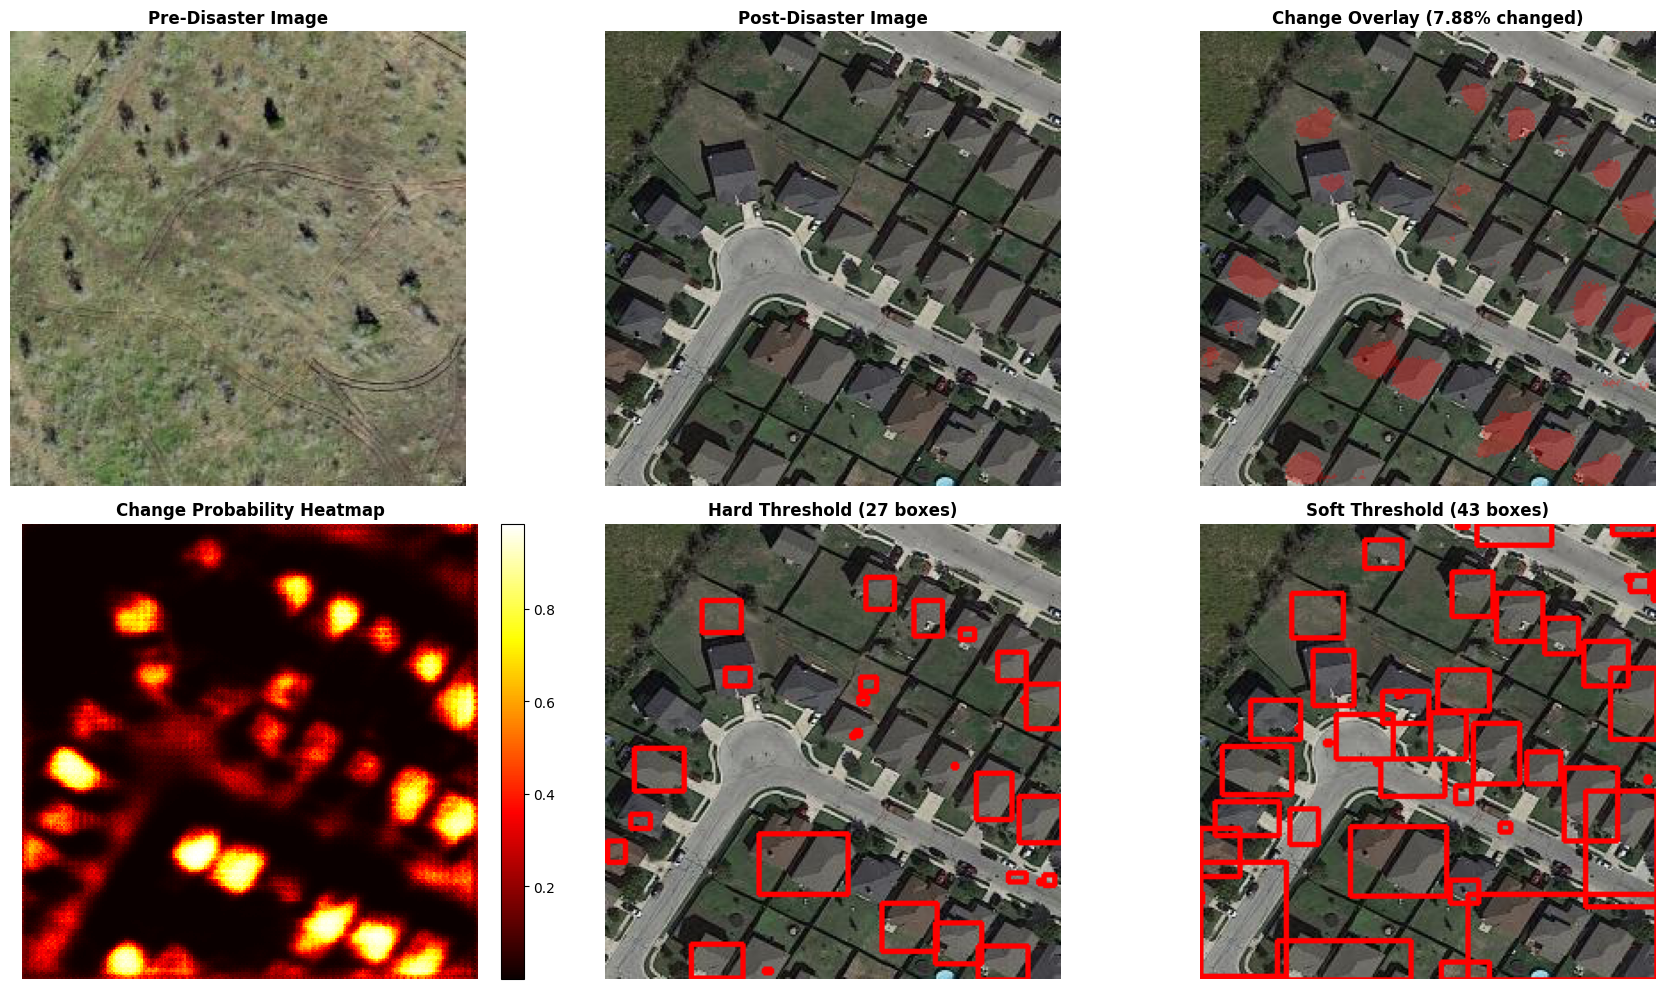

✅ PIPELINE COMPLETE

📋 SUMMARY:
  Changed area: 7.88%
  Detection boxes: 27 (hard) / 43 (soft)


In [9]:
# ---------------------------
#  Usage
# ---------------------------
if __name__ == "__main__":
    # Configuration
    checkpoint_path = "/content/finetune-changeformer/content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/best_ckpt.pt"
    pre_path = '/content/finetune-changeformer/LEVIR-CD256/A/test_100_11.png'
    post_path = '/content/finetune-changeformer/LEVIR-CD256/B/test_100_11.png'

    # Run pipeline
    results = run_change_detection_pipeline(
        checkpoint_path=checkpoint_path,
        pre_image_path=pre_path,
        post_image_path=post_path,
        min_area=4,  # Lower threshold for sensitive detection
        soft_threshold=0.15,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        save_outputs=False,  # Set to True to save visualizations
        output_dir='/content/outputs',
        show_plots=True
    )

    # Access results
    print("\n📋 SUMMARY:")
    print(f"  Changed area: {results['statistics']['change_percentage']:.2f}%")
    print(f"  Detection boxes: {results['statistics']['num_hard_boxes']} (hard) / {results['statistics']['num_soft_boxes']} (soft)")


Usage


In [10]:
    checkpoint_path = "/content/finetune-changeformer/content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/best_ckpt.pt"
    pre_path = '/content/finetune-changeformer/LEVIR-CD256/A/test_102_13.png'
    post_path = '/content/finetune-changeformer/LEVIR-CD256/B/test_102_13.png'

🔧 LOADING MODEL
✓ Model loaded from: /content/finetune-changeformer/content/finetune-changeformer/checkpoints/1_CHANGEFORMER_FINETUNED/best_ckpt.pt

📸 PREPROCESSING IMAGES
✓ Pre-disaster:  /content/finetune-changeformer/LEVIR-CD256/A/test_102_13.png
✓ Post-disaster: /content/finetune-changeformer/LEVIR-CD256/B/test_102_13.png

🔍 RUNNING CHANGE DETECTION
✓ Inference complete
  - Total pixels: 65536
  - Changed pixels: 3368
  - Change percentage: 5.14%
  - Unique mask values: [0 1]

  Soft threshold (0.15):
  - Changed pixels: 12573
  - Change percentage: 19.18%

  Bounding boxes (min area: 16):
  - Hard threshold: 11 boxes
  - Soft threshold: 18 boxes

📊 GENERATING VISUALIZATIONS


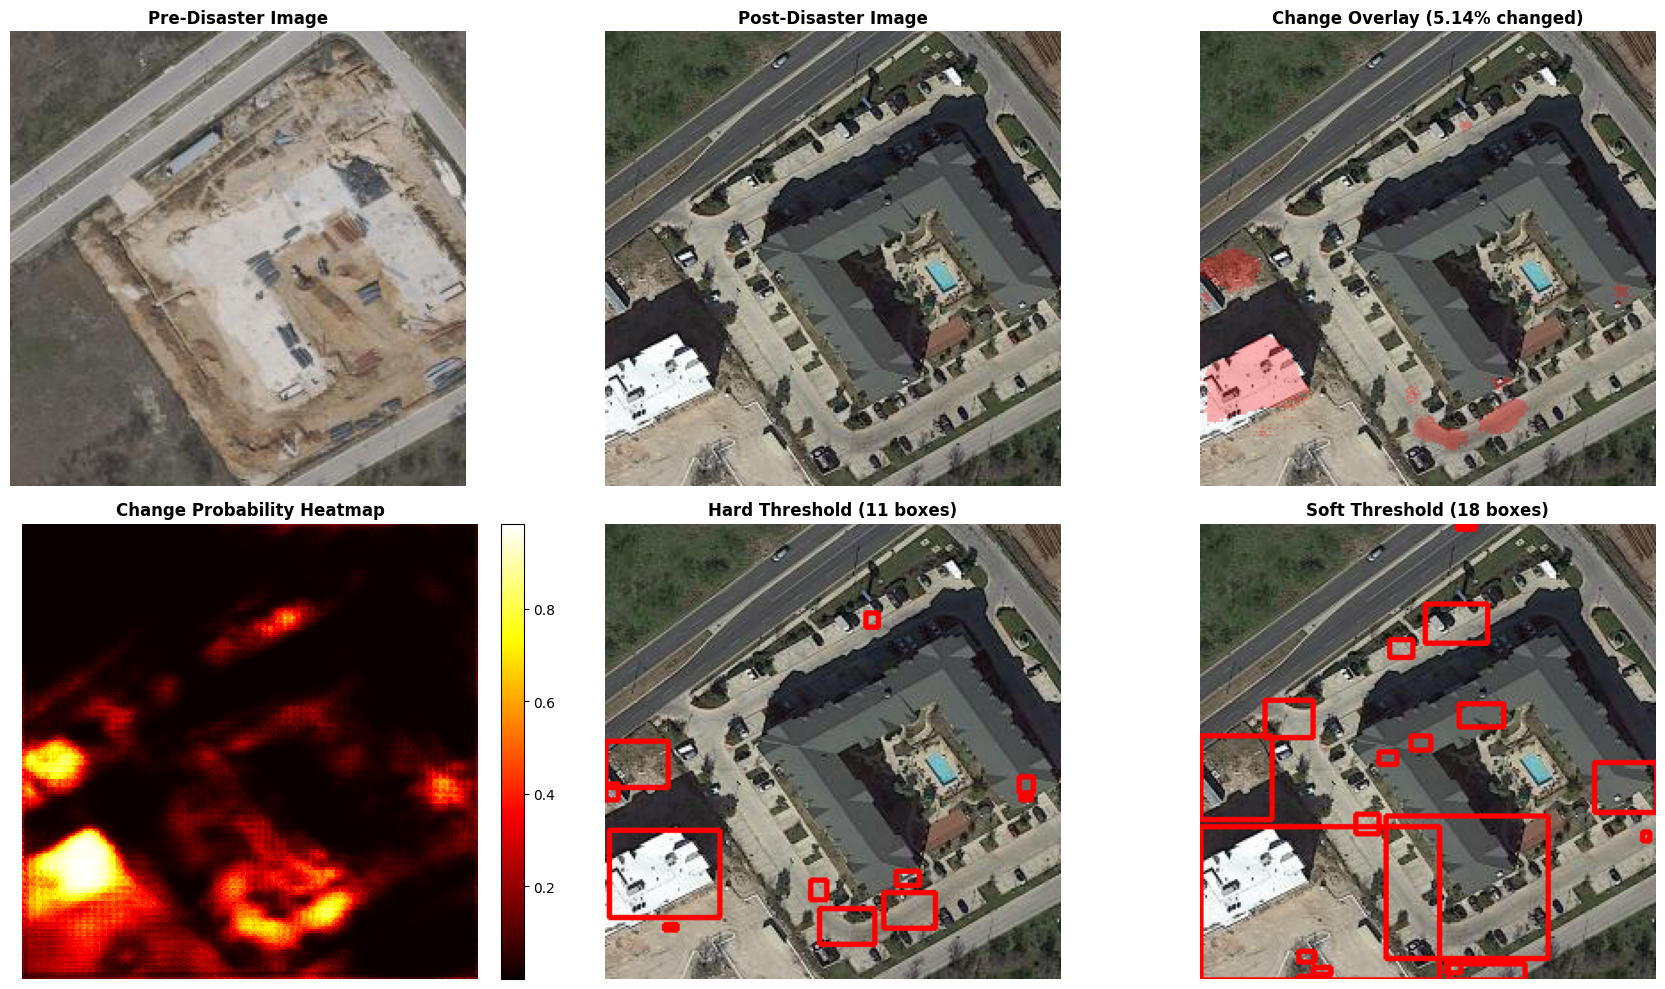

✅ PIPELINE COMPLETE


In [11]:
results = run_change_detection_pipeline(checkpoint_path, pre_path, post_path)
